In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

#from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("titanic_train.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
np.logical_not(data.isnull()).sum()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [7]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

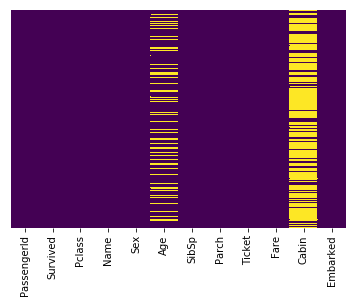

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

**count plot on survivors**

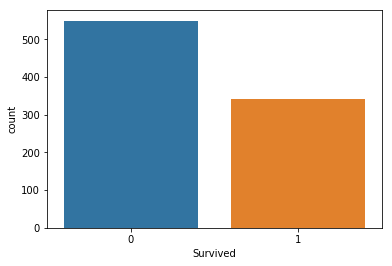

In [9]:
sns.countplot(x='Survived',data=data)

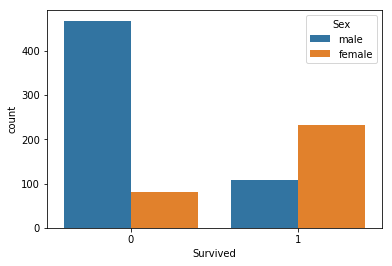

In [10]:
sns.countplot(x='Survived',hue='Sex',data=data)

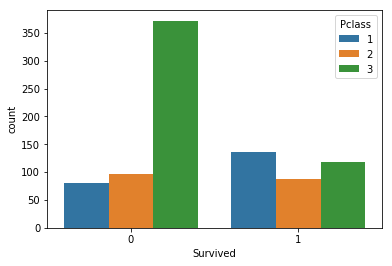

In [11]:
sns.countplot(x='Survived',hue='Pclass',data=data)

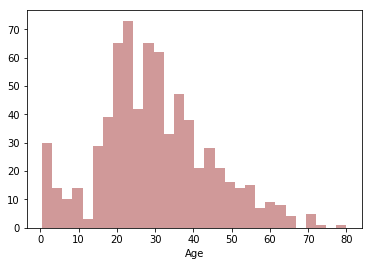

In [12]:
sns.distplot(data['Age'].dropna(),kde=False,color='darkred',bins=30)

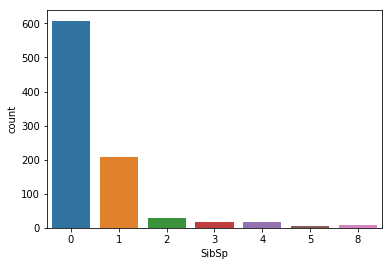

In [13]:
sns.countplot(x='SibSp',data=data)

**Data Cleaning**

In [14]:
#data['Age'].mean()
#def fill_age(col):
  #  Age = col[0]
   # if pd.isnull(Age):
    #    return mean_age
    #else:
     #   return Age
#data['Age'] = data[['Age']].apply(fill_age,axis=1)

In [15]:
data['Age'] = data['Age'].fillna((data['Age'].mean()))
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
data['Age'].replace(np.NaN,data['Age'].mean())
data['Age'].isnull().sum()

0

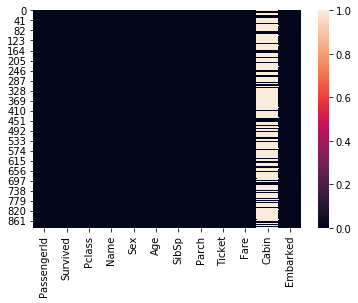

In [17]:
sns.heatmap(data.isnull())

In [18]:
data.drop(['Cabin'],inplace=True,axis=1)

In [19]:
data.drop(['Name'],inplace=True,axis=1)

**Dealing with categorical data**

In [20]:
sex =pd.get_dummies(data['Sex'],drop_first=True)

In [21]:
embark = pd.get_dummies(data['Embarked'],drop_first=True)

In [22]:
data.drop(['Ticket'],inplace=True,axis=1)

In [23]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [24]:
data=pd.concat([data,sex,embark],axis=1)

In [25]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,1,0,3,male,22.0,1,0,7.2500,S,1,0,1
1,2,1,1,female,38.0,1,0,71.2833,C,0,0,0
2,3,1,3,female,26.0,0,0,7.9250,S,0,0,1
3,4,1,1,female,35.0,1,0,53.1000,S,0,0,1
4,5,0,3,male,35.0,0,0,8.0500,S,1,0,1


In [32]:
#data.drop('Embarked',axis=1,inplace=True)
data.drop('Sex',axis=1,inplace=True)

**Split the dataset**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X = data.drop('Survived',axis=1)
y = data['Survived']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=101)

## Import logistic regression model


In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
model = LogisticRegression()

In [42]:
model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [43]:
prediction = model.predict(X_test)

In [49]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [50]:
print(classification_report(y_test,prediction))

             precision    recall  f1-score   support

          0       0.77      0.87      0.81       154
          1       0.78      0.64      0.71       114

avg / total       0.77      0.77      0.77       268



In [51]:
print(accuracy_score(y_test,prediction))

0.7723880597014925


In [52]:
print(confusion_matrix(y_test,prediction))

[[134  20]
 [ 41  73]]


In [53]:
tn,fp,fn,tp =confusion_matrix(y_test,prediction).ravel()

In [ ]:
accuracy=(tp+tn)/(tn+fp+fn+tp)
accuracy

In [ ]:
data.head()

In [55]:
#model.predict([[5,3,35.0,0,0,8.0500,1,0,1,1,0,1]])

## SVM

In [44]:
from sklearn.svm import SVC

In [45]:
clf = SVC()

In [46]:
clf.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [47]:
predictions = clf.predict(X_test)

In [56]:
print(confusion_matrix(y_test,predictions))

[[150   4]
 [112   2]]


In [60]:
accuracy = accuracy_score(y_test,predictions)
accuracy

0.5671641791044776

# Grid search

In [61]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid ={'C':[0.1,1,10,100,1000],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [71]:
grid =GridSearchCV(SVC(),param_grid,refit=True,verbose=3)

In [72]:
grid.fit(X_train,y_train)

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6328502415458938, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV]  C=0.1, gamma=0.01, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf .........

[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6490384615384616, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.6730769230769231, total=   0.0s
[CV] C=100, gamma=0.0001, kernel=rbf .................................
[CV]  C=100, gamma=0.0001, kernel=rbf, score=0.7101449275362319, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6346153846153846, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6394230769230769, total=   0.0s
[CV] C=1000, gamma=1, kernel=rbf .....................................
[CV]  C=1000, gamma=1, kernel=rbf, score=0.6376811594202898, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=1000, gamma=0.1, kernel=rbf, score=0.625, total=   0.0s
[CV] C=1000, gamma=0.1, kernel=rbf ......

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    8.7s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': [0.1, 1, 10, 100, 1000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['rbf']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=3)

In [75]:
grid.best_params_

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [74]:
predict_=grid.predict(X_test)

In [76]:
accuracy_score(y_test,predict_)

0.7313432835820896